# Surprise Housing Assignment

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house.

### Steps to follow:

1. Reading and Understanding data.
2. Performing EDA on the data.
3. Preparing the data for Model.
4. Training the model.
5. Predictions and Evaluation on the Test set.

In [113]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Data Dictionary

- __MSSubClass__: Identifies the type of dwelling involved in the sale.
- __MSZoning__: Identifies the general zoning classification of the sale.
- __LotFrontage__: Linear feet of street connected to property
- __LotArea__: Lot size in square feet
- __Street__: Type of road access to property
- __Alley__: Type of alley access to property
- __LotShape__: General shape of property
- __LandContour___: Flatness of the property
- __Utilities__: Type of utilities available
- __LotConfig__: Lot configuration
- __LandSlope__: Slope of property
- __Neighborhood__: Physical locations within Ames city limits
- __Condition1__: Proximity to various conditions
- __Condition2__: Proximity to various conditions (if more than one is present)
- __BldgType__: Type of dwelling
- __HouseStyle__: Style of dwelling
- __OverallQual__: Rates the overall material and finish of the house
- __OverallCond__: Rates the overall condition of the house
- __YearBuilt__: Original construction date
- __YearRemodAdd__: Remodel date (same as construction date if no remodeling or additions)
- __RoofStyle__: Type of roof
- __RoofMatl__: Roof material
- __Exterior1st__: Exterior covering on house
- __Exterior2nd__: Exterior covering on house (if more than one material)
- __MasVnrType__: Masonry veneer type
- __MasVnrArea__: Masonry veneer area in square feet
- __ExterQual__: Evaluates the quality of the material on the exterior 
- __ExterCond__: Evaluates the present condition of the material on the exterior
- __Foundation__: Type of foundation
- __BsmtQual__: Evaluates the height of the basement
- __BsmtCond__: Evaluates the general condition of the basement
- __BsmtExposure__: Refers to walkout or garden level walls
- __BsmtFinType1__: Rating of basement finished area
- __BsmtFinSF1__: Type 1 finished square feet
- __BsmtFinType2__: Rating of basement finished area (if multiple types)
- __BsmtFinSF2__: Type 2 finished square feet
- __BsmtUnfSF__: Unfinished square feet of basement area
- __TotalBsmtSF__: Total square feet of basement area
- __Heating__: Type of heating
- __HeatingQC__: Heating quality and condition
- __CentralAir__: Central air conditioning
- __Electrical__: Electrical system
- __1stFlrSF__: First Floor square feet
- __2ndFlrSF__: Second floor square feet
- __LowQualFinSF__: Low quality finished square feet (all floors)
- __GrLivArea__: Above grade (ground) living area square feet
- __BsmtFullBath__: Basement full bathrooms
- __BsmtHalfBath__: Basement half bathrooms
- __FullBath__: Full bathrooms above grade
- __HalfBath__: Half baths above grade
- __Bedroom__: Bedrooms above grade (does NOT include basement bedrooms)
- __Kitchen__: Kitchens above grade
- __KitchenQual__: Kitchen quality
- __TotRmsAbvGrd__: Total rooms above grade (does not include bathrooms)
- __Functional__: Home functionality (Assume typical unless deductions are warranted)
- __Fireplaces__: Number of fireplaces
- __FireplaceQu__: Fireplace quality
- __GarageType__: Garage location
- __GarageYrBlt__: Year garage was built
- __GarageFinish__: Interior finish of the garage
- __GarageCars__: Size of garage in car capacity
- __GarageArea__: Size of garage in square feet
- __GarageQual__: Garage quality
- __GarageCond__: Garage condition
- __PavedDrive__: Paved driveway
- __WoodDeckSF__: Wood deck area in square feet
- __OpenPorchSF__: Open porch area in square feet
- __EnclosedPorch__: Enclosed porch area in square feet
- __3SsnPorch__: Three season porch area in square feet
- __ScreenPorch__: Screen porch area in square feet
- __PoolArea__: Pool area in square feet
- __PoolQC__: Pool quality
- __Fence__: Fence quality
- __MiscFeature__: Miscellaneous feature not covered in other categories
- __MiscVal__: Value of miscellaneous feature
- __MoSold__: Month Sold (MM)
- __YrSold__: Year Sold (YYYY)
- __SaleType__: Type of sale
- __SaleCondition__: Condition of sale

## Step 1: Reading and Understanding the data

In [114]:
# reading the data csv file
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Quality Check

In [115]:
# checking the shape of the dataframe
df.shape

(1460, 81)

In [116]:
# checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
# checking the high level distribution of data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Performing EDA on the data

In [118]:
# dropping the varibale ID since it will not give any information for the model
df.drop(columns =['Id'], inplace=True)

In [119]:
# checking the values of Fireplaces when Fireplace Qu is Nan
df[df['Fireplaces']==0][['Fireplaces','FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


In [120]:
# checking the number unique values in Fireplaces and its counts
df[df['FireplaceQu'].isna()]['Fireplaces'].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [121]:
# from the above observation we can replace all Nan values in FireplaceQu with 'NA' No Fireplace
df['FireplaceQu'].fillna('NA', inplace=True)

In [122]:
# dropping variables 'Alley', 'PoolQc', 'Fence' & 'MiscFeature'
df.drop(columns =['Alley', 'PoolQC', 'Fence' ,'MiscFeature'],inplace = True)

In [123]:
# checking the how many unique value and its counts for the below columns
print(df['Street'].value_counts())
print('--------------------------------')
print(df['Utilities'].value_counts())
print('--------------------------------')
print(df['Condition2'].value_counts())

# dropping the variables where data is biased like 'Street','Utilities','Condition2'
df.drop(columns =['Street','Utilities','Condition2'],inplace=True)

Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


In [124]:
# Replacing Nan values with mean value of the column 'LotFrontage'
df['LotFrontage'].fillna(round(df['LotFrontage'].mean()), inplace=True)

In [125]:
# dropping the rows which has missing values
df.dropna(inplace=True)

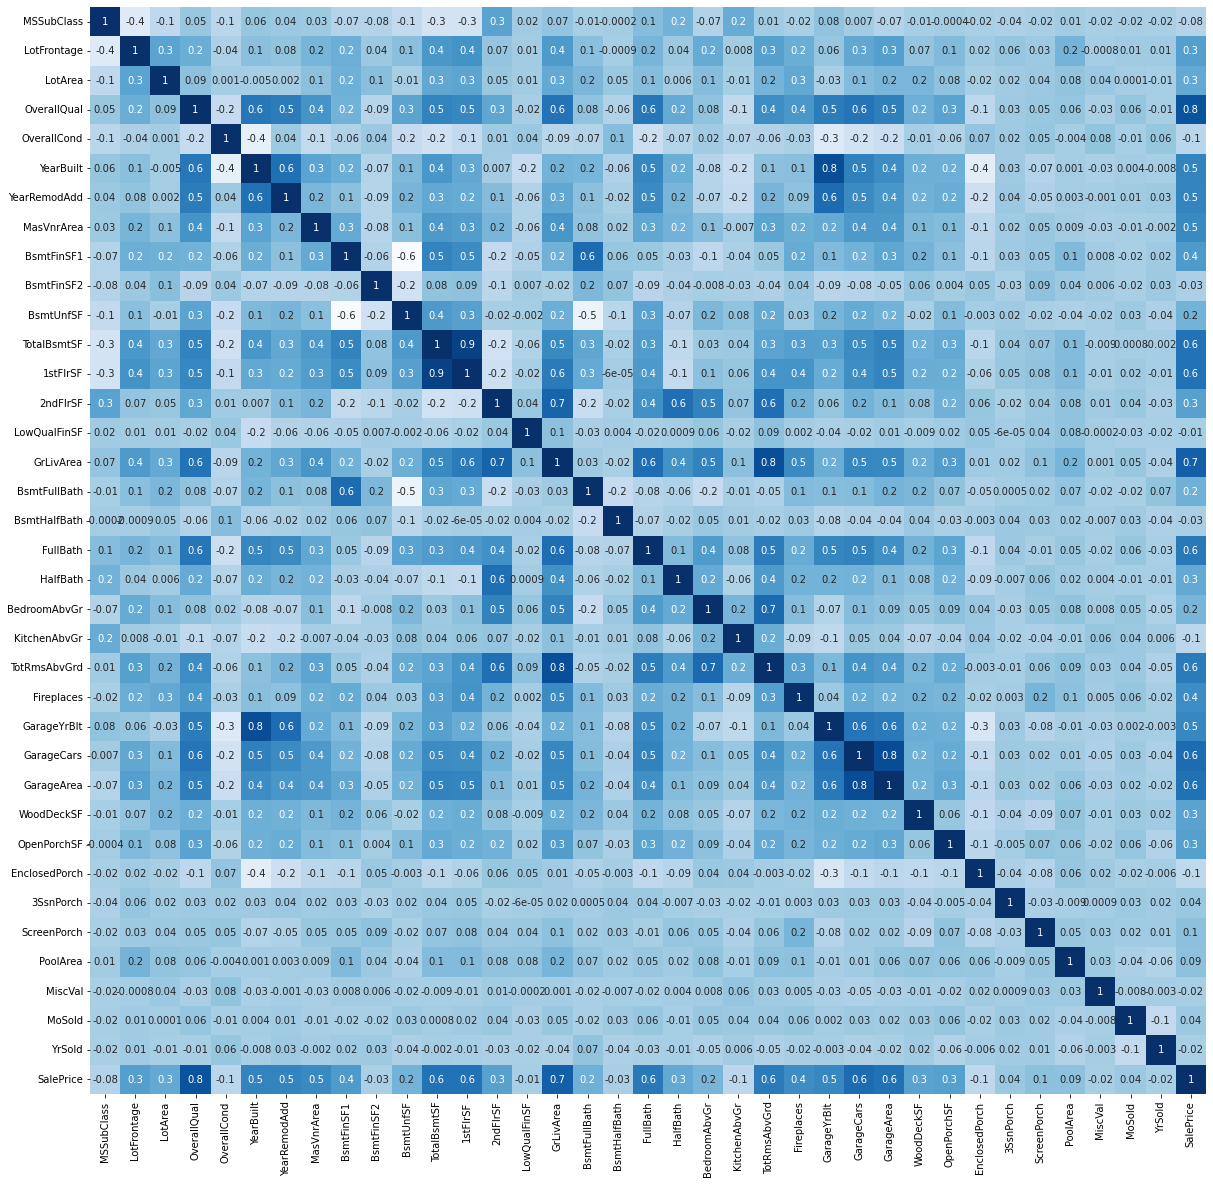

In [126]:
# Visualizing the correlation between the variables
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.1g',cbar=False)
plt.show()

__Observation:__ from the above heatmap '1stFlrSF','GarageCars' and 'TotRmsAbvGrd' are highly correlated and hence dropping them from dataframe

In [127]:
# dropping the variables since they are highly correlated '1stFlrSF','GarageCars'
df.drop(columns=['1stFlrSF','GarageCars','TotRmsAbvGrd'], inplace=True)

In [128]:
# Creating the variable 'YrBuiltAge'
df['YrBuiltAge'] = df['YearBuilt'].max() - df['YearBuilt']

In [129]:
# Creating the variable 'YrRemodAddAge'
df['YrRemodAddAge'] = df['YearRemodAdd'].max() - df['YearRemodAdd']

In [130]:
# Creating the variable 'YrSoldAge'
df['YrSoldAge'] = df['YrSold'].max() - df['YrSold']

In [131]:
# Creating the variable 'GarageYrBltAge'
df['GarageYrBltAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [132]:
# resetting the index of the dataframe
df.reset_index(inplace=True, drop=True)

In [133]:
# dropping the columns 'YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'
df.drop(columns = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], inplace=True)

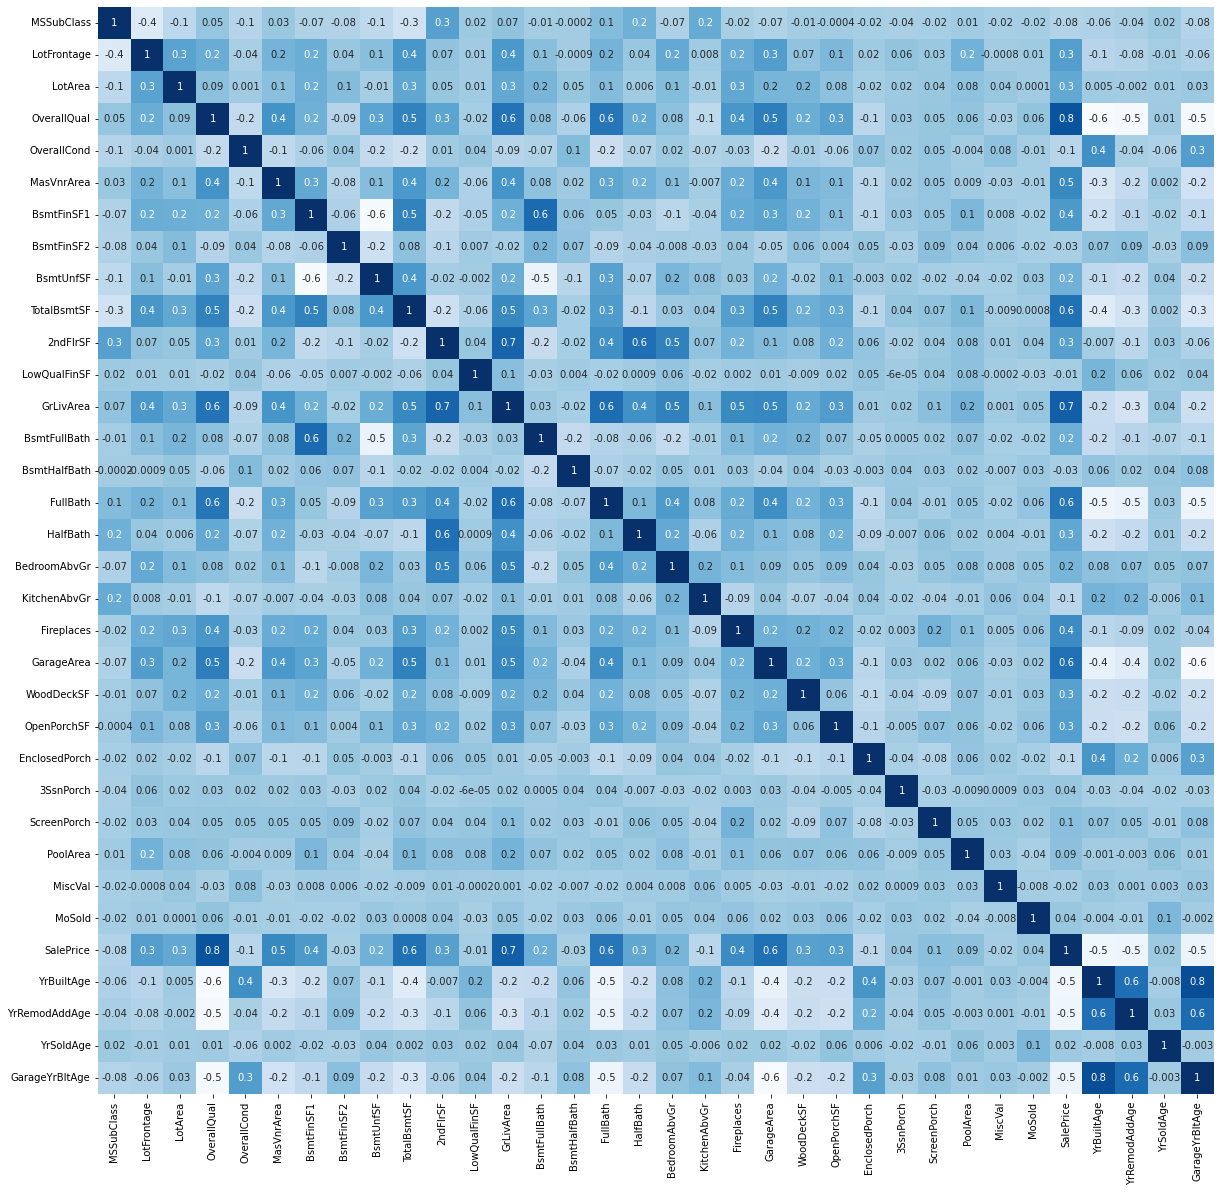

In [134]:
# Visualizing the Correlation of variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues', cbar=False, fmt='.1g')
plt.show()

In [135]:
# creating the correlation dataframe
corr_df = df.corr()

In [137]:
# taking the values of the correlation dataframe which are with correlation more than 0.7
positive_high_corr = corr_df[(corr_df>0.7) & (corr_df!=1)]

# fetching the columns with positive high correlation
positive_high_corr = positive_high_corr.dropna(axis=1, how='all')
positive_high_corr = list(positive_high_corr.columns)
positive_high_corr.remove('SalePrice')

<Figure size 1152x720 with 0 Axes>

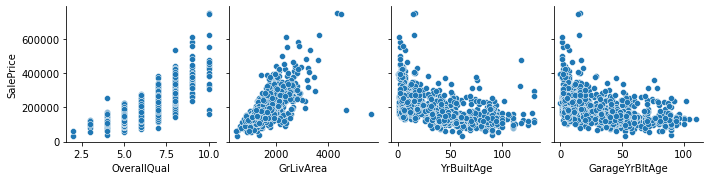

In [138]:
# Plot the scatter plots for the positively high correlated columns with Sales Price
plt.figure(figsize=(16,10))
sns.pairplot(df, x_vars = positive_high_corr, y_vars = 'SalePrice')
plt.show()

__Observation:__ from the above visualization we can conclude the below points
1. Overall quality variable is linearly in relationship with Sale Price
2. Ground living Area is also linearly in relationship with Sale Price

In [95]:
# taking the values of the correlation dataframe which are with correlation more than -0.5
negative_high_corr = corr_df[(corr_df<-0.5)]

# fetching the columns with negative high correlation
negative_high_corr = negative_high_corr.dropna(axis=1, how='all')
negative_high_corr = list(negative_high_corr.columns)
negative_high_corr.remove('SalePrice')

<Figure size 1152x720 with 0 Axes>

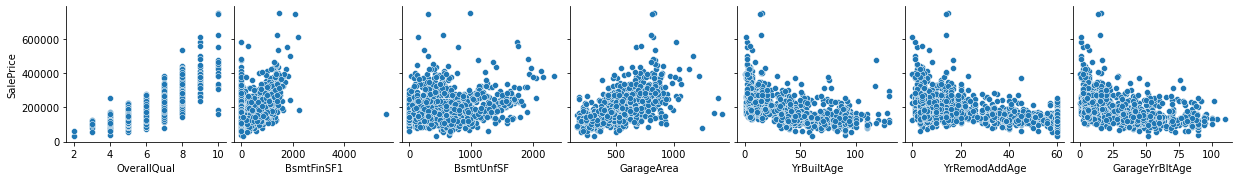

In [96]:
# Plot the scatter plots for the negatively high correlated columns with Sales Price
plt.figure(figsize=(16,10))
sns.pairplot(df, x_vars = negative_high_corr, y_vars = 'SalePrice')
plt.show()

__Observation:__ from the above visualization we can conclude the below points
1. Garage Area variable is linearly in relationship with Sale Price

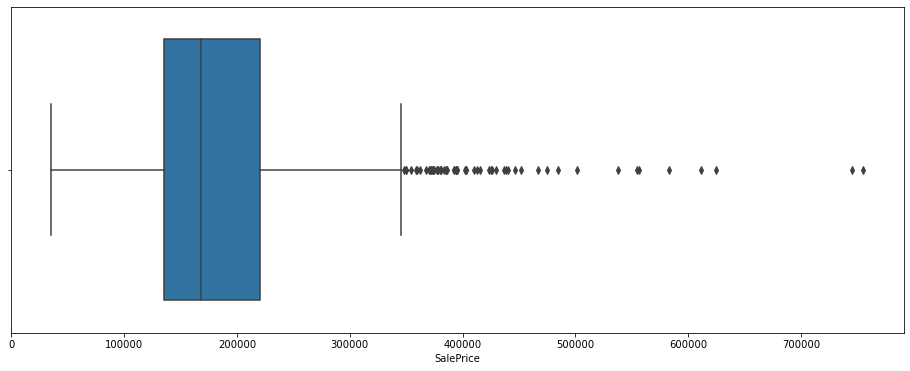

In [97]:
# Visualizing the Variable Sale Price for checking the outliers
plt.figure(figsize = (16,6))
sns.boxplot(df['SalePrice'])
plt.show()

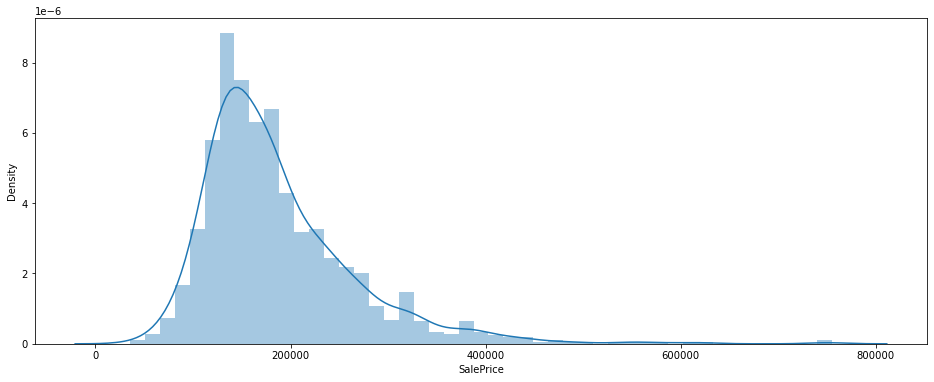

In [98]:
# Visualizing the Distribution of the Sale Price to check Skewness
plt.figure(figsize=(16,6))
sns.distplot(df['SalePrice'])
plt.show()

In [99]:
# checking the IQR for Sale Price column
df['SalePrice'].quantile(0.75) + ((df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25)) * 1.5)

347500.0

In [100]:
# removing the rows with Sale Price more than 400000
df1 = df[df['SalePrice']<400000]

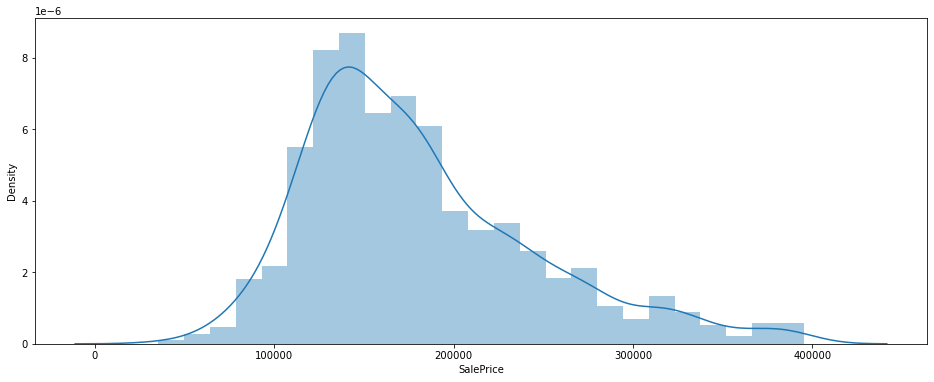

In [101]:
# Visualizing the Distribution of the Sale Price to check Skewness after removing the outliers
plt.figure(figsize=(16,6))
sns.distplot(df1['SalePrice'])
plt.show()

__Observation__: from the above distribution plot after removing the outliers also data looks skewed hence variable 'SalePrice' need to be transformed using Logarithmic scale

In [102]:
# Applying logaithmic scale to the column SalePrice
df['log_SalePrice'] = np.log(df['SalePrice'])

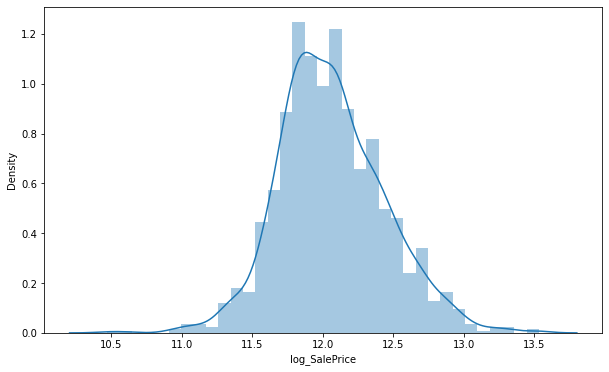

In [103]:
# Visualizing the Distribution of the Sale Price to check Skewness after Converting the SalePrice column
plt.figure(figsize=(10,6))
sns.distplot(df['log_SalePrice'])
plt.show()

__Observation:__ after applying the logarithm to the saleprice the distribution of the Log_SalePrice looks uniformly distributed

In [104]:
# Creating the dummy variable for all categorical variables and dropping the original variable in loop
str_cols = list(df.select_dtypes(include=['object']).columns)
for i in range(len(str_cols)):
    new_df = pd.get_dummies(df[str_cols[i]])
    cols = [str_cols[i]+' '+j for j in new_df.columns]
    new_df.columns = cols
    df = pd.concat([df,new_df], axis=1)
    df.drop(columns=[str_cols[i]],inplace=True)

## Step3: Preparing the data for Model

In [105]:
# Scaling the numericals columns
scaler = StandardScaler()

num_cols = list(df.select_dtypes(exclude = ['object']).columns)
num_cols.remove('SalePrice')
num_cols.remove('log_SalePrice')

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType ConLw,SaleType New,SaleType Oth,SaleType WD,SaleCondition Abnorml,SaleCondition AdjLand,SaleCondition Alloca,SaleCondition Family,SaleCondition Normal,SaleCondition Partial
0,0.093701,-0.253733,-0.218363,0.589337,-0.553402,0.461582,0.527157,-0.296255,-0.983421,-0.591875,...,-0.054759,-0.309553,-0.027349,0.394259,-0.262088,-0.027349,-0.07252,-0.123185,0.460387,-0.313882
1,-0.876298,0.423360,-0.107067,-0.165963,2.230251,-0.594820,1.120240,-0.296255,-0.678727,0.409598,...,-0.054759,-0.309553,-0.027349,0.394259,-0.262088,-0.027349,-0.07252,-0.123185,0.460387,-0.313882
2,0.093701,-0.118314,0.052620,0.589337,-0.553402,0.278328,0.047458,-0.296255,-0.337652,-0.434007,...,-0.054759,-0.309553,-0.027349,0.394259,-0.262088,-0.027349,-0.07252,-0.123185,0.460387,-0.313882
3,0.336201,-0.479430,-0.111906,0.589337,-0.553402,-0.594820,-0.541263,-0.296255,-0.096626,-0.838543,...,-0.054759,-0.309553,-0.027349,0.394259,3.815513,-0.027349,-0.07252,-0.123185,-2.172084,-0.313882
4,0.093701,0.603918,0.343926,1.344638,-0.553402,1.291612,0.415954,-0.296255,-0.210318,0.120996,...,-0.054759,-0.309553,-0.027349,0.394259,-0.262088,-0.027349,-0.07252,-0.123185,0.460387,-0.313882


## Step4: Training the Model

In [106]:
# Spliiting the data into train and test data
df_train, df_test = train_test_split(df,train_size=0.8,random_state=42)

# creating X_train and X_test dataframes
X_train = df_train.drop(columns = ['SalePrice','log_SalePrice']) 
X_test = df_test.drop(columns = ['SalePrice','log_SalePrice'])

# creating y_train and y_test dataframes
y_train = df_train['log_SalePrice']
y_test = df_test['log_SalePrice']

## Multi Linear Regression

In [107]:
# Creatng the variable model
lr = LinearRegression()

# Training the model
lr.fit(X_train,y_train)

# creating the metrics for train and test data and printing them
y_train_pred = lr.predict(X_train)
print('Train R^2 value : ',round(r2_score(y_train,y_train_pred),2))

y_test_pred = lr.predict(X_test)
print('Test R^2 value : ',round(r2_score(y_test,y_test_pred),2))

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('Train RSS value : ',round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('Test RSS value : ',round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('Train MSE value : ',round(mse_train_lr,3))

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('Test MSE value : ',round(mse_test_lr,3))

Train R^2 value :  0.94
Test R^2 value :  -6.687099715104905e+18
Train RSS value :  9.03
Test RSS value :  2.2526295423333817e+20
Train MSE value :  0.008
Test MSE value :  8.40533411318426e+17


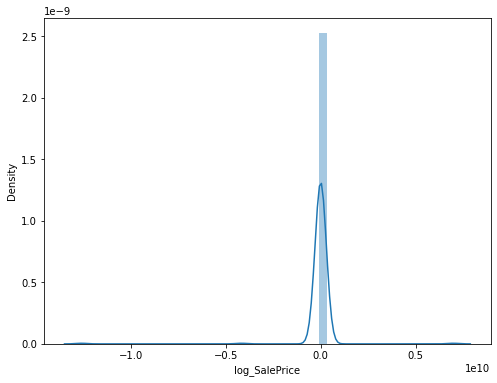

In [108]:
# Plotting the distribution for residual analysis
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_test_pred))
plt.show()

__Conclusion:__ Based on the R^2 score of the Train and Test data Multi Linear Regression is not best method to go for modelling

## Ridge Regression

In [109]:
# Applying Lasso Regression with varying huperparameter 'Lambda'
params = {'alpha' : [0.0001, 0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]}

ridge = Ridge()

# cross-validation
cv_model = GridSearchCV(estimator=ridge,
                       param_grid = params,
                       scoring = 'r2',
                        cv=10,
                        return_train_score = True,
                        verbose = 1                     
                       )
cv_model.fit(X_train,y_train)  

Fitting 10 folds for each of 43 candidates, totalling 430 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [110]:
# creating the dataframe and storing the cross-validated models results
cv_result_train_ridge= pd.DataFrame(cv_model.cv_results_)
cv_result_train_ridge['param_alpha'] = cv_result_train_ridge['param_alpha'].astype('float32')
cv_result_train_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008365,0.002505,0.003102,0.000822,0.0001,{'alpha': 0.0001},-0.087625,0.917641,0.883032,0.940791,...,0.9456,0.939604,0.943531,0.94256,0.943011,0.94437,0.941734,0.940672,0.944018,0.004941
1,0.006301,0.001007,0.002599,0.000663,0.0010,{'alpha': 0.001},-0.087622,0.917641,0.883032,0.940791,...,0.9456,0.939604,0.943531,0.94256,0.943011,0.94437,0.941734,0.940672,0.944018,0.004941
2,0.007239,0.001075,0.003500,0.000672,0.0020,{'alpha': 0.002},-0.087618,0.917641,0.883032,0.940792,...,0.9456,0.939604,0.943531,0.94256,0.943011,0.94437,0.941734,0.940672,0.944018,0.004941
3,0.007001,0.001340,0.003098,0.000832,0.0030,{'alpha': 0.003},-0.087615,0.917641,0.883032,0.940792,...,0.9456,0.939604,0.943531,0.94256,0.943011,0.94437,0.941734,0.940672,0.944018,0.004941
4,0.009001,0.003975,0.002998,0.001000,0.0040,{'alpha': 0.004},-0.087612,0.917641,0.883033,0.940793,...,0.9456,0.939604,0.943531,0.94256,0.943011,0.94437,0.941734,0.940672,0.944018,0.004941


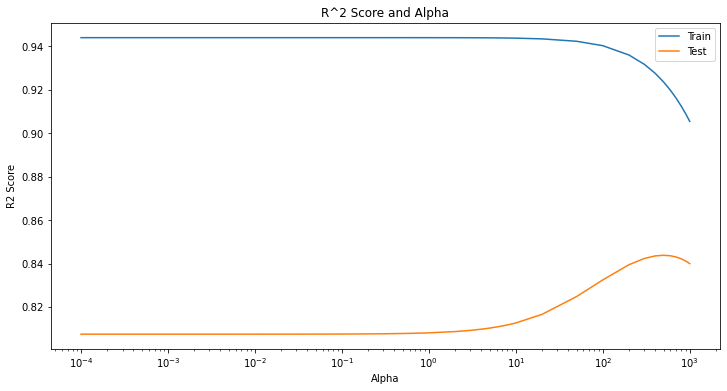

In [111]:
# Visualizing the R^2 score and alpha for Train and Test datas
plt.figure(figsize=(12,6))
plt.plot(cv_result_train_ridge['param_alpha'], cv_result_train_ridge['mean_train_score'])
plt.plot(cv_result_train_ridge['param_alpha'], cv_result_train_ridge['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.title('R^2 Score and Alpha')
plt.legend(['Train','Test'])
plt.show()

In [112]:
# best hyperparameter alpha
print(cv_model.best_params_)

{'alpha': 500}


In [46]:
# Model with correct value of alpha
ridge = Ridge(alpha =500)

# Training the model
ridge.fit(X_train,y_train)

# creating the metrics for train and test data and printing them
y_train_pred = ridge.predict(X_train)
print('Train R^2 value : ',round(r2_score(y_train,y_train_pred),3))

y_test_pred = ridge.predict(X_test)
print('Test R^2 value : ',round(r2_score(y_test,y_test_pred),3))

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('Train RSS value : ',round(rss1_lr,3))

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('Test RSS value : ',round(rss2_lr,3))

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('Train MSE value : ',round(mse_train_lr,3))

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('Test MSE value : ',round(mse_test_lr,3))

Train R^2 value :  0.924
Test R^2 value :  0.857
Train RSS value :  11.904
Test RSS value :  4.823
Train MSE value :  0.011
Test MSE value :  0.018


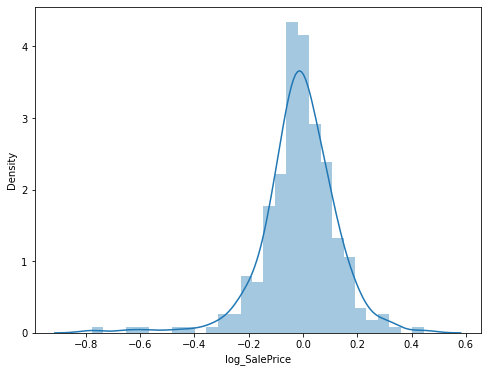

In [48]:
# Plotting the distribution for residual analysis
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_test_pred))
plt.show()

In [49]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(i,3) for i in model_parameters]
columns = X_train.columns
columns = columns.insert(0,'Constant')
var_coeff = pd.DataFrame()
var_coeff['Variables'] = columns
var_coeff['Co-efficient'] = model_parameters

# removing the signs of the coefficient variables in order 
var_coeff['Co-efficient'] = [abs(i) for i in var_coeff['Co-efficient']]
var_coeff = var_coeff[var_coeff['Co-efficient']!=0]
var_coeff = var_coeff.sort_values(by=['Co-efficient'], ascending=False)
var_coeff.head(10)

,Variables,Co-efficient
0,Constant,12.066
13,GrLivArea,0.035
4,OverallQual,0.031
108,RoofMatl ClyTile,0.026
21,GarageArea,0.023
10,TotalBsmtSF,0.022
16,FullBath,0.019
203,KitchenQual Ex,0.017
20,Fireplaces,0.017
163,BsmtQual Ex,0.017


## Lasso Regression

In [50]:
# Applying Lasso Regression with varying huperparameter 'Lambda'
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross-validation
cv_model = GridSearchCV(estimator=lasso,
                       param_grid = params,
                       scoring = 'r2',
                        cv=10,
                        return_train_score = True,
                        verbose = 1                     
                       )
cv_model.fit(X_train,y_train)  

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
# creating the dataframe and storing the cross-validated models results
cv_result_train_lasso= pd.DataFrame(cv_model.cv_results_)
cv_result_train_lasso['param_alpha'] = cv_result_train_lasso['param_alpha'].astype('float32')
cv_result_train_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.107120,0.048152,0.003997,0.002528,0.0001,{'alpha': 0.0001},-0.073810,0.918517,0.885627,0.943303,...,0.945531,0.939529,0.943441,0.942482,0.942949,0.944305,0.941665,0.940606,0.943946,0.004939
1,0.018800,0.004023,0.003403,0.000665,0.0010,{'alpha': 0.001},-0.020052,0.921127,0.898355,0.947710,...,0.943117,0.937251,0.940980,0.940332,0.940440,0.941789,0.939352,0.938443,0.941624,0.004884
2,0.009999,0.002324,0.002500,0.000500,0.0100,{'alpha': 0.01},0.026533,0.918106,0.882747,0.929092,...,0.911682,0.907125,0.911974,0.911909,0.910705,0.911326,0.908407,0.909178,0.912040,0.006168
3,0.008199,0.001720,0.003700,0.001100,0.0500,{'alpha': 0.05},0.241190,0.818582,0.765744,0.836628,...,0.792568,0.788611,0.793326,0.799645,0.800592,0.790759,0.785232,0.793080,0.797596,0.014646
4,0.006700,0.000781,0.003200,0.000601,0.1000,{'alpha': 0.1},0.388388,0.714249,0.641875,0.711648,...,0.668257,0.660710,0.670937,0.678375,0.677292,0.666710,0.659944,0.670284,0.674442,0.017743


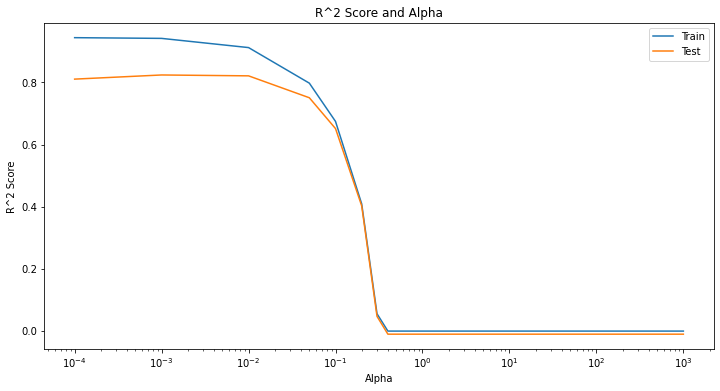

In [52]:
# Visualizing the R^2 score and alpha for Train and Test datas
plt.figure(figsize=(12,6))
plt.plot(cv_result_train_lasso['param_alpha'], cv_result_train_lasso['mean_train_score'])
plt.plot(cv_result_train_lasso['param_alpha'], cv_result_train_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R^2 Score')
plt.xlabel('Alpha')
plt.title('R^2 Score and Alpha')
plt.legend(['Train','Test'])
plt.show()

In [53]:
# best hyperparameter alpha
print(cv_model.best_params_)

{'alpha': 0.001}


In [54]:
# Model with correct value of alpha 0.001
lasso = Lasso(alpha =0.001)

# Training the model
lasso.fit(X_train,y_train)

# creating the metrics for train and test data and printing them
y_train_pred = lasso.predict(X_train)
print('Train R^2 value : ',round(r2_score(y_train,y_train_pred),3))

y_test_pred = lasso.predict(X_test)
print('Test R^2 value : ',round(r2_score(y_test,y_test_pred),3))

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('Train RSS value : ',round(rss1_lr,3))

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('Test RSS value : ',round(rss2_lr,3))

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('Train MSE value : ',round(mse_train_lr,3))

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('Test MSE value : ',round(mse_test_lr,3))

Train R^2 value :  0.94
Test R^2 value :  0.871
Train RSS value :  9.391
Test RSS value :  4.354
Train MSE value :  0.009
Test MSE value :  0.016


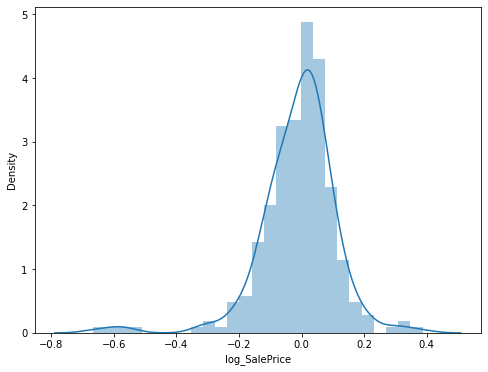

In [56]:
# Plot for Residual Analysis
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_test_pred))
plt.show()

In [57]:
# creating the dataframe to store variables and its coefficients
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(i,3) for i in model_parameters]
columns = X_train.columns
columns = columns.insert(0,'Constant')
var_coeff = pd.DataFrame()
var_coeff['Variables'] = columns
var_coeff['Co-efficient'] = model_parameters

# removing the signs of the coefficient variables in order 
var_coeff['Co-efficient'] = [abs(i) for i in var_coeff['Co-efficient']]
var_coeff = var_coeff[var_coeff['Co-efficient']!=0]
var_coeff = var_coeff.sort_values(by=['Co-efficient'], ascending=False)
var_coeff.head(10)

,Variables,Co-efficient
0,Constant,12.066
13,GrLivArea,0.122
108,RoofMatl ClyTile,0.064
4,OverallQual,0.060
30,YrBuiltAge,0.039
5,OverallCond,0.035
10,TotalBsmtSF,0.033
21,GarageArea,0.033
34,MSZoning C (all),0.032
61,Neighborhood Crawfor,0.022


## Step5: Predictions and Evaluation on the Test set.

In [58]:
# Changing the alpha value to 0.002 
lasso = Lasso(alpha =0.002)

# Training the model
lasso.fit(X_train,y_train)

# creating the metrics for train and test data and printing them
y_train_pred = lasso.predict(X_train)
print('Train R^2 value : ',round(r2_score(y_train,y_train_pred),2))

y_test_pred = lasso.predict(X_test)
print('Test R^2 value : ',round(r2_score(y_test,y_test_pred),2))

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('Train RSS value : ',round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('Test RSS value : ',round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('Train MSE value : ',round(mse_train_lr,3))

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('Test MSE value : ',round(mse_test_lr,3))

Train R^2 value :  0.94
Test R^2 value :  0.88
Train RSS value :  9.92
Test RSS value :  4.15
Train MSE value :  0.009
Test MSE value :  0.016


In [59]:
# creating the variable cols which has only variables with coefficients not equal to 0
model_parameters = list(lasso.coef_)
cols = [X_train.columns[i] for i in range(len(model_parameters)) if abs(model_parameters[i])!=0]

In [60]:
# Modeling with the value of alpha 0.03 and by considering the only cols variables
lasso = Lasso(alpha =0.003)

# Training the model
lasso.fit(X_train[cols],y_train)

# creating the metrics for train and test data and printing them
y_train_pred = lasso.predict(X_train[cols])
print('Train R^2 value : ',round(r2_score(y_train,y_train_pred),2))

y_test_pred = lasso.predict(X_test[cols])
print('Test R^2 value : ',round(r2_score(y_test,y_test_pred),2))

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print('Train RSS value : ',round(rss1_lr,2))

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print('Test RSS value : ',round(rss2_lr,2))

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print('Train MSE value : ',round(mse_train_lr,3))

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print('Test MSE value : ',round(mse_test_lr,3))

Train R^2 value :  0.93
Test R^2 value :  0.88
Train RSS value :  10.47
Test RSS value :  4.1
Train MSE value :  0.01
Test MSE value :  0.015


__Conclusion:__ Best alpha value is 0.003 for Lasso Regression from the above metrics

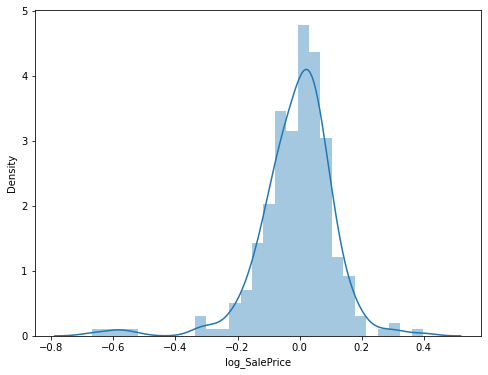

In [61]:
# Plot for Residual Analysis
plt.figure(figsize=(8,6))
sns.distplot((y_test-y_test_pred))
plt.show()

In [62]:
# creating the dataframe to store variables and its coefficients
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(i,3) for i in model_parameters]
columns = X_train[cols].columns
columns = columns.insert(0,'Constant')
var_coeff = pd.DataFrame()
var_coeff['Variables'] = columns
var_coeff['Co-efficient'] = model_parameters

# removing the signs of the coefficient variables in order 
var_coeff['Co-efficient'] = [abs(i) for i in var_coeff['Co-efficient']]
var_coeff = var_coeff[var_coeff['Co-efficient']!=0]
var_coeff = var_coeff.sort_values(by=['Co-efficient'], ascending=False)
var_coeff.head(10)

,Variables,Co-efficient
0,Constant,12.066
9,GrLivArea,0.124
4,OverallQual,0.064
68,RoofMatl ClyTile,0.063
25,YrBuiltAge,0.041
5,OverallCond,0.033
7,TotalBsmtSF,0.033
17,GarageArea,0.033
27,MSZoning C (all),0.030
42,Neighborhood Crawfor,0.021


__Conclusion:__ Few Important Features that affects the Sale Price are listed on priority order

- GrLivArea
- OverallQual
- RoofMatl ClyTile
- YrBuiltAge
- OverallCond
- TotalBsmtSF
- GarageArea